# PyZLS: Zelus in Python

## A not so trivial first example
- Node application
- Automaton
- Parametric state

In [1]:
from pyzls import PyZL

In [2]:
code = """
let node cpt i incr = o where 
    rec o = i fby o + incr

let node sawtooth(i) = o where
    rec init o = 0
    and automaton
      | Up -> do o = cpt 0 1 until (o > 10) then Down(o)
      | Down(i) -> do o = cpt 10 (-1) until (o < 1) then Up
"""
test = PyZL(code)

In [3]:
t = test.sawtooth()
t.reset()  
[t.step(0) for _ in range(20)]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [4]:
print(test)

(* Zelus code *)

let node cpt i incr = o where 
    rec o = i fby o + incr

let node sawtooth(i) = o where
    rec init o = 0
    and automaton
      | Up -> do o = cpt 0 1 until (o > 10) then Down(o)
      | Down(i) -> do o = cpt 10 (-1) until (o < 1) then Up

--------------------------------------------------------------------------------

# Python Code

from operator import *
from pyzls import Node

def cpt(i_23):
    class cpt(Node):
        def __init__ (self):
            pass
            self.i_28 = False
            self.m_26 = 42
            
        def reset (self, ):
            self.i_28 = True
            
        def step (self, incr_24):
            if self.i_28:
                self.m_26 = i_23
            self.i_28 = False
            x_27 = self.m_26
            o_25 = add(x_27 , incr_24)
            self.m_26 = o_25
            return o_25
            
    return cpt

class sawtooth(Node):
    def __init__ (self):
        pass
        self.r_33 = False
        self

In [5]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

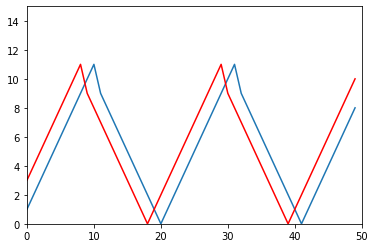

In [6]:
t2 = test.sawtooth()
t2.reset()

t3 = test.sawtooth()
t3.reset()
t3.step(0)
t3.step(0)

n = 50
p = []
pp = []
for x in range(n):
    clear_output(wait=True)
    p.append(t2.step(0))
    pp.append(t3.step(0))
    t = [i for i in range(len(p))]
    plt.plot(t , p)
    plt.plot(t , pp, 'r')
    plt.axis((0 , n , 0 , 15))
    plt.show() 
#     time.sleep(0.01)

## Import python functions

- Extract python type signatures
- Compile zli interface
- Generate python module
- (also static parameters)

In [7]:
from pyzls import PyZL, zllib

In [8]:
@zllib
def g(x: int, y:float) -> int:
    return x + y

@zllib
def gg(x: int, y:int) -> int:
    return g(x, y)

In [9]:
code = """
let node sawtooth i p a = o where
    rec init o = 0
    and automaton
      | Up -> do o = gg(last o, 1) until (o > 10) then Down
      | Down -> do o = gg(last o, -1) until (o < 1) then Up
"""
test = PyZL(code)

In [10]:
t = test.sawtooth(12)(5)()
t.reset()
[t.step(0) for _ in range(20)]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2]

In [11]:
print(test.py_code)

from operator import *
from pyzls import Node
import tmptpa5p5u6

def sawtooth(i_18):
    def sawtooth(p_19):
        class sawtooth(Node):
            def __init__ (self):
                pass
                self.r_23 = False
                self.s_22 = "Tmpfmh37x12_Down_13"
                self.o_20 = 42
                
            def reset (self, ):
                self.r_23 = False
                self.s_22 = "Tmpfmh37x12_Up_12"
                self.o_20 = 0
                
            def step (self, a_17):
                l_21 = self.o_20
                if self.s_22 == "Tmpfmh37x12_Up_12":
                    if self.r_23:
                        pass
                    self.o_20 = tmptpa5p5u6.gg(l_21 , 1)
                    if gt(self.o_20 , 10) == True:
                        self.r_23 = True
                        self.s_22 = "Tmpfmh37x12_Down_13"
                    else:
                        self.r_23 = False
                elif self.s_22 == "Tmpfmh37x12_Down_13

## Use imported python modules
- Example with numpy

In [12]:
from pyzls import zllib, PyZL

In [13]:
@zllib
def foo(x: "'a") -> "'b":
    import numpy as np
    return np.arange(x)

In [14]:
code = """
let node dummy i = o where
    rec o = foo(i)
"""
test = PyZL(code)

In [15]:
d = test.dummy()
d.reset()
[d.step(i) for i in range(2, 10)]

[array([0, 1]),
 array([0, 1, 2]),
 array([0, 1, 2, 3]),
 array([0, 1, 2, 3, 4]),
 array([0, 1, 2, 3, 4, 5]),
 array([0, 1, 2, 3, 4, 5, 6]),
 array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8])]

In [16]:
foo(45)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])